In [193]:
import pandas as pd
import numpy as np
import os
import numpy
import matplotlib.pyplot as plt
import SimpleITK
import itertools
import sys
import torch
from torchvision import transforms
from PIL import Image
from matplotlib import cm
from torch.utils.data import DataLoader
from torch.nn.utils.rnn import pad_sequence
from torchvision import models

from pathlib import Path

SOURCE_PATH = Path(os.getcwd()) / 'src'

if SOURCE_PATH not in sys.path:
    sys.path.append(SOURCE_PATH)

from src.extraction import (
    get_images_lists_from_path,
    get_images_lists_from_more_paths,
    delete_bad_dirs_brats2020
)

from src.plots import (
    plot_observation,
    plot_deeplab_mobile_predictions
)

from src.deeplab_mobile.modelling import(
    select_images_input,
    get_deeplab_mobile_model,
    train_deeplab_mobile
)

from src.deeplab_mobile.segdataset import(
    get_mobile_dataloaders
)

from src.utils import(
    LOGS_FILE_PATH
)

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [194]:
hgg = Path(os.getcwd()) / 'data' / 'HGG'
lgg = Path(os.getcwd()) / 'data' / 'LGG'
two = Path(os.getcwd()) / 'data' / 'brats2020'
hgg_2018 = Path(os.getcwd()) / 'data' / 'brats2018' / 'HGG'
lgg_2018 = Path(os.getcwd()) / 'data' / 'brats2018' / 'LGG'

In [195]:
bad_dirs = delete_bad_dirs_brats2020(two)

In [196]:
t2, t1ce, t1, flair, seg = get_images_lists_from_path(hgg)
t2l, t1cel, t1l, flairl, segl = get_images_lists_from_path(lgg)

type_names = ['t2', 't1', 't1ce', 'flair', 'seg']
images = [t2, t1, t1ce, flair, seg]
imagesl = [t2l, t1l, t1cel, flairl, segl]
all_images = get_images_lists_from_more_paths([hgg, lgg, two, hgg_2018, lgg_2018])

In [197]:
print(len(all_images[0]), 'images used')

983 images used


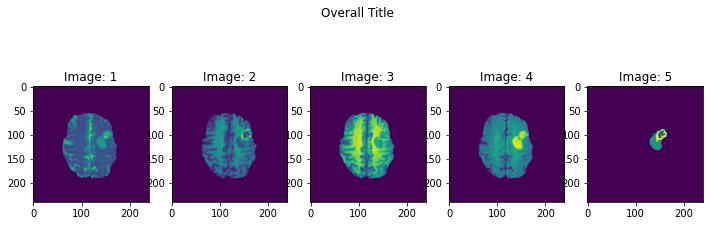

In [198]:
plot_observation(all_images, 0)

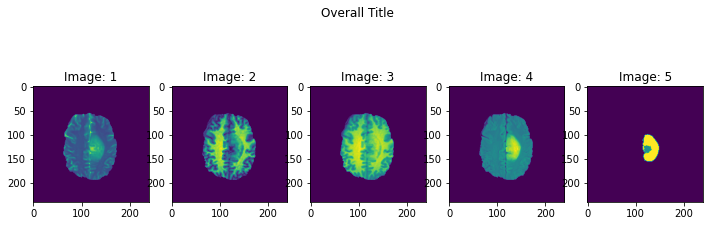

In [199]:
plot_observation(all_images, -1)

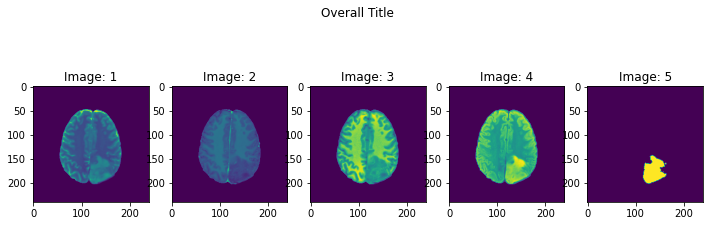

In [200]:
plot_observation(all_images, 600)

In [201]:
type_to_use = 'flair'
images_chosen, images_seg = select_images_input(all_images, type_names, type_to_use = type_to_use)

In [202]:
model = get_deeplab_mobile_model() 

In [203]:
another = models.segmentation.deeplabv3_mobilenet_v3_large(
    pretrained=False,
    progress=True,
    num_classes = 3
)

In [204]:
dataloaders = get_mobile_dataloaders(images_chosen, images_seg)

In [206]:
train_deeplab_mobile(model, dataloaders, num_epochs=25)

Epoch 1/25
----------


100%|██████████| 71/71 [08:08<00:00,  6.88s/it]


Train Loss: 0.0348


100%|██████████| 71/71 [02:45<00:00,  2.33s/it]


Test Loss: 0.0658
{'epoch': 1, 'Train_loss': 0.03480633720755577, 'Test_loss': 0.06578794121742249, 'Train_f1_score': 0.30339973596344555, 'Test_f1_score': [0, 0.6173682017086893, 0.67850173804921, 0.650289456875488, 0.5512193935857223, 0.6069620648709456, 0.6972495805063107, 0.5674530844864324, 0.5745986269528083, 0.6403383354759645, 0.6512895944814993, 0.7244321843821703, 0.6267215332999685, 0.6467266366816592, 0.6212829624088273, 0.6072161445946864, 0.5811508562577091, 0.6664764994009731, 0.6905974585846646, 0.6797340936199925, 0.6540604948230818, 0.592617757469722, 0.6726907630522088, 0.37034795132438586, 0.6536940104686938, 0.6317434402332363, 0.6678744366535825, 0.641219226260258, 0.5993105590981048, 0.555549151272371, 0.6589043186326874, 0.6012477386849713, 0.6468422393869894, 0.6262763054685876, 0.5267936195629261, 0.3933905000481742, 0.6505697493103035, 0.6811161706832801, 0.5378391242265588, 0.6968371350206575, 0.5938089938584559, 0.6538199421897398, 0.6917853969818614, 0.646

100%|██████████| 71/71 [07:29<00:00,  6.33s/it]


Train Loss: 0.0247


100%|██████████| 71/71 [02:41<00:00,  2.27s/it]


Test Loss: 0.0460
{'epoch': 2, 'Train_loss': 0.024698179215192795, 'Test_loss': 0.04597161337733269, 'Train_f1_score': 0.42368912344844717, 'Test_f1_score': [0, 0.5563571245842927, 0.5853541275797374, 0.5564741832305232, 0.4389513468498768, 0.5248917912135974, 0.6158671210697343, 0.48118595391945695, 0.5600696876627692, 0.5589186822453397, 0.49986926395607273, 0.6226383080654337, 0.4894449759576556, 0.5938807392893078, 0.5604156551676304, 0.5059160428349124, 0.4633717050821989, 0.5950801896308251, 0.5886733572112486, 0.6235813584463072, 0.514103532870289, 0.5448153282060455, 0.6146077125265547, 0.5571127554270594, 0.5825149040283952, 0.6217751337777645, 0.5470202983397643, 0.5646566029962118, 0.523272604381087, 0.6465197836381288, 0.6455010682168231, 0.43092991913746626, 0.5062753024001573, 0.5926830705603146, 0.4716568420272124, 0.4441097679625755, 0.5748713986923178, 0.6083793952343352, 0.43365038765886016, 0.6461489310721227, 0.5071246464927844, 0.6045679437533075, 0.632662300134848

100%|██████████| 71/71 [07:18<00:00,  6.17s/it]


Train Loss: 0.0199


100%|██████████| 71/71 [02:39<00:00,  2.25s/it]


Test Loss: 0.0423
{'epoch': 3, 'Train_loss': 0.01991872489452362, 'Test_loss': 0.04228727146983147, 'Train_f1_score': 0.4687651623579353, 'Test_f1_score': [0, 0.5790307971014492, 0.6063859402800807, 0.5863989744127989, 0.4662372526652544, 0.5335099258010625, 0.6103213982387913, 0.4680083687234574, 0.6211669633748725, 0.5404734393054558, 0.5224857661212785, 0.6352778188078417, 0.5112999316339486, 0.6016020264489312, 0.573873256730732, 0.5046494184838106, 0.4923402478073229, 0.604381912630106, 0.5802431396524561, 0.6398613763349601, 0.5419134045989388, 0.6525372274835536, 0.5919312637012941, 0.5875188114373538, 0.6165011034116128, 0.6602242862506327, 0.5702439826089555, 0.5722964622723231, 0.5401319263945987, 0.6501636106647046, 0.6443094561016787, 0.3655617339827866, 0.5370654780966323, 0.636336894620417, 0.513729088727324, 0.5102375102375103, 0.5596304515194058, 0.6519694122092619, 0.4484201437893303, 0.6160091335785868, 0.538366967917446, 0.5948606667889939, 0.6474783772397215, 0.5321

100%|██████████| 71/71 [07:17<00:00,  6.16s/it]


Train Loss: 0.0195


100%|██████████| 71/71 [02:37<00:00,  2.22s/it]


Test Loss: 0.0353
{'epoch': 4, 'Train_loss': 0.019469967111945152, 'Test_loss': 0.035256337374448776, 'Train_f1_score': 0.48916251609522576, 'Test_f1_score': [0, 0.5914426049599165, 0.6052916190855976, 0.6081501803273636, 0.49547486839258664, 0.4912094491617679, 0.6650733536787145, 0.4833110401509236, 0.6486785721608267, 0.5502033353299076, 0.545520055637951, 0.6621520980508979, 0.5425802384465643, 0.6497498618216863, 0.5758980001294415, 0.5399406031069144, 0.5325035913903207, 0.6280239805620115, 0.5818667034762003, 0.6753839997537475, 0.5721852568094661, 0.6656765056088237, 0.6259413917387978, 0.6022600367208646, 0.6526868665540541, 0.6414213260761998, 0.6039712283805488, 0.5614078825102554, 0.5453467077332889, 0.6743961352657004, 0.653485269594219, 0.39582844402722367, 0.5760615483970601, 0.6709126651193269, 0.5215242914179548, 0.5240074686873918, 0.57385053692746, 0.6949952586661047, 0.46834050045711567, 0.6276000258548252, 0.5670923060274862, 0.6153318661691066, 0.658072227439597, 

100%|██████████| 71/71 [07:18<00:00,  6.17s/it]


Train Loss: 0.0182


100%|██████████| 71/71 [02:38<00:00,  2.23s/it]


Test Loss: 0.0362
{'epoch': 5, 'Train_loss': 0.018180949613451958, 'Test_loss': 0.03623129427433014, 'Train_f1_score': 0.5050717209279016, 'Test_f1_score': [0, 0.6175243973642506, 0.6406525318929448, 0.5972389638154154, 0.5329517433972728, 0.516251893529539, 0.6986502534765231, 0.5280198406631674, 0.665031847133758, 0.561634623953852, 0.5765167308575669, 0.6643420206347771, 0.5797388590539041, 0.652516475340136, 0.6108213323358479, 0.5675314784225676, 0.5760054133890288, 0.6477143936531923, 0.6068668287867478, 0.6745793214051797, 0.5419368744017394, 0.6701160200143655, 0.6206952595936794, 0.626196840216341, 0.6681603883676422, 0.6607337155106614, 0.6372691973720858, 0.5674626352860334, 0.5786847264302264, 0.6821840891511732, 0.6997670204504272, 0.37544878997999287, 0.5551106142223126, 0.6827392213482028, 0.508358902302641, 0.5313600727190092, 0.6159182560795631, 0.6970144243322018, 0.5189540024456778, 0.6410341574884746, 0.5976606175281672, 0.6247871687023316, 0.6708964450527366, 0.562

100%|██████████| 71/71 [07:19<00:00,  6.19s/it]


Train Loss: 0.0194


100%|██████████| 71/71 [02:39<00:00,  2.24s/it]


Test Loss: 0.0255
{'epoch': 6, 'Train_loss': 0.019399646669626236, 'Test_loss': 0.025475554168224335, 'Train_f1_score': 0.5184805818669103, 'Test_f1_score': [0, 0.5330547360548012, 0.5134246603445535, 0.4727501951131657, 0.432608813318178, 0.37115231625971484, 0.5350722730702993, 0.41912702610210617, 0.5737427379976476, 0.40782791934870977, 0.48836632941656705, 0.5897435897435898, 0.5082279757683023, 0.5702788318389916, 0.5459503484057796, 0.41611382435141014, 0.5023480553575268, 0.609656564382352, 0.5099829886292415, 0.5999708940381288, 0.49161992723509895, 0.5740860522370472, 0.5095132485117311, 0.5841322817126096, 0.5772111665517604, 0.5164738808211116, 0.5354868768442305, 0.4541991722521334, 0.4295225695875014, 0.6348075650686992, 0.5978644710430452, 0.3102199768445427, 0.49688096907565465, 0.6228382357957453, 0.3754121777670979, 0.35957725565551574, 0.47910557714252694, 0.6583594889157995, 0.3896723380062953, 0.42820217262216637, 0.5157365395795999, 0.541622098539374, 0.6433496289

100%|██████████| 71/71 [07:20<00:00,  6.20s/it]


Train Loss: 0.0265


100%|██████████| 71/71 [02:39<00:00,  2.25s/it]


Test Loss: 0.0332
{'epoch': 7, 'Train_loss': 0.02648451365530491, 'Test_loss': 0.033184830099344254, 'Train_f1_score': 0.5314717194025723, 'Test_f1_score': [0, 0.5850922067876155, 0.5802945504687084, 0.5267368699913901, 0.4685048768842508, 0.45602564749835917, 0.6328691832722004, 0.448181388757676, 0.6566481609278276, 0.4549608691174956, 0.5110525590159164, 0.617166272779533, 0.5202946622440688, 0.6089429455453098, 0.5733872881301585, 0.4683182429903565, 0.5200538200538201, 0.6345465883356854, 0.5563463045181509, 0.6331223001851303, 0.46317635104171506, 0.6098507766361295, 0.5918331091541252, 0.6364669128088611, 0.6324614177347633, 0.6077849941417268, 0.5674905011240636, 0.5154191880922971, 0.4551223301648817, 0.6835851384889842, 0.6184780657276083, 0.36365915729562354, 0.5489466000562527, 0.6267110054681919, 0.44962295081967213, 0.43914706791274605, 0.5547047501603939, 0.682170462849556, 0.43602057520579085, 0.5317213962860099, 0.5381784018223704, 0.5961718681526129, 0.646959583363896

100%|██████████| 71/71 [07:20<00:00,  6.20s/it]


Train Loss: 0.0276


100%|██████████| 71/71 [02:39<00:00,  2.25s/it]


Test Loss: 0.0217
{'epoch': 8, 'Train_loss': 0.027551310136914253, 'Test_loss': 0.021689023822546005, 'Train_f1_score': 0.5396041818195907, 'Test_f1_score': [0, 0.5307037778932799, 0.49125864763416316, 0.49161753365434246, 0.4207071682086161, 0.42693032015065924, 0.6154459833795014, 0.39650183494871555, 0.5710257128844671, 0.43003334483155115, 0.453096218441868, 0.5828032031903849, 0.47212363915399735, 0.5705579206811562, 0.5171580914186756, 0.4259968412626296, 0.47180901856763924, 0.5593327146278029, 0.5040530726805237, 0.5998243733198292, 0.4566745579283023, 0.5349540396710207, 0.5021866880444352, 0.5602866633433198, 0.582663166191574, 0.5547008, 0.515675457918299, 0.4554748797483403, 0.450736800931949, 0.6050387706075738, 0.5696231990971884, 0.3452008176866086, 0.47130054046658004, 0.5462742032105109, 0.3909788802074448, 0.3997318649748623, 0.5147536441578032, 0.6377293122053729, 0.39264899876459625, 0.5277451223589555, 0.4724124944737661, 0.5210620697634061, 0.5837307140569683, 0.4

100%|██████████| 71/71 [07:19<00:00,  6.20s/it]


Train Loss: 0.0177


100%|██████████| 71/71 [02:40<00:00,  2.26s/it]


Test Loss: 0.0277
{'epoch': 9, 'Train_loss': 0.01766536943614483, 'Test_loss': 0.02766387350857258, 'Train_f1_score': 0.5558280315152182, 'Test_f1_score': [0, 0.5945433352431001, 0.5488282539333259, 0.5602958621170888, 0.4698091289121789, 0.48418818345468717, 0.6720855301698887, 0.4569304523032029, 0.6382787090317739, 0.49694969079057333, 0.544122063060504, 0.6322986160886586, 0.5307320254334005, 0.6094008182577574, 0.5784988698656828, 0.4881621953445158, 0.5415586238033935, 0.6133595409441079, 0.5696557738101893, 0.6502468228127298, 0.47151197379689985, 0.6357141262363526, 0.6080746856167485, 0.6099148777872602, 0.6362195611145088, 0.6056345964220312, 0.5687893873557596, 0.5150438628289712, 0.4951017117928778, 0.6654826831165445, 0.6293966002587832, 0.39453630873672585, 0.5260467834004328, 0.6168990121699277, 0.46612923864363404, 0.44602537685717375, 0.5779522065236351, 0.6773430354067768, 0.4487232817099705, 0.5927223195174158, 0.5588100656135765, 0.5804534405567975, 0.65076726154570

100%|██████████| 71/71 [07:21<00:00,  6.22s/it]


Train Loss: 0.0183


100%|██████████| 71/71 [02:40<00:00,  2.26s/it]


Test Loss: 0.0253
{'epoch': 10, 'Train_loss': 0.01825648918747902, 'Test_loss': 0.025282690301537514, 'Train_f1_score': 0.5660861774953502, 'Test_f1_score': [0, 0.5933668740897657, 0.5640156766100186, 0.5796590925632105, 0.4779794763528129, 0.5284047736110491, 0.6836210504953132, 0.46035122087735253, 0.6364623392964048, 0.49850647662020936, 0.5560027665975018, 0.6423765602363362, 0.544307932675236, 0.6140308297394345, 0.5776202596900473, 0.4939241106184206, 0.549764656627041, 0.6290101598437965, 0.5589021485052175, 0.6559946798403953, 0.483733678585202, 0.6438837287154668, 0.5853613336365857, 0.6339035874063772, 0.6516436228452116, 0.5948637911464245, 0.5777496653476708, 0.5435415316690646, 0.4990973422279717, 0.6848845239364291, 0.6151132791433249, 0.3937501726853259, 0.5409033627379451, 0.6128528369964578, 0.47125627104666346, 0.4763734683311281, 0.580750668811604, 0.6796411375380293, 0.4598470600906372, 0.5689989660900779, 0.5510897586126084, 0.5867647840178524, 0.6508178350961349, 

100%|██████████| 71/71 [07:20<00:00,  6.21s/it]


Train Loss: 0.0203


100%|██████████| 71/71 [02:41<00:00,  2.27s/it]


Test Loss: 0.0218
{'epoch': 11, 'Train_loss': 0.0203276127576828, 'Test_loss': 0.021766971796751022, 'Train_f1_score': 0.5689935726075364, 'Test_f1_score': [0, 0.6061830045052042, 0.5985420650095602, 0.5720077673217677, 0.4858539962785062, 0.5126721013195031, 0.6657837294287887, 0.46487226596064235, 0.6303634899750604, 0.506860439661321, 0.5390281477677569, 0.6325481431403908, 0.5612086330935252, 0.6307473971088755, 0.5889183026236469, 0.5094966638033509, 0.5564194502107316, 0.6239415277653979, 0.5748929456840207, 0.6671417356120539, 0.505697793922784, 0.6427531198888715, 0.6074220113057436, 0.6245943559576639, 0.661847874635917, 0.6343210490154516, 0.5781883764584638, 0.5409420644501723, 0.5129161798348536, 0.6879598895104571, 0.642793061451562, 0.39548037743941666, 0.5629060838747785, 0.639355992844365, 0.47542301835788464, 0.4767528197150231, 0.5776491249746274, 0.6847155304971808, 0.47994302532112615, 0.5606495415412612, 0.5559440786272665, 0.5897456535737283, 0.6443126328767389, 0

100%|██████████| 71/71 [07:18<00:00,  6.18s/it]


Train Loss: 0.0196


100%|██████████| 71/71 [02:40<00:00,  2.25s/it]


Test Loss: 0.0287
{'epoch': 12, 'Train_loss': 0.019612621515989304, 'Test_loss': 0.028739744797348976, 'Train_f1_score': 0.5634616475670273, 'Test_f1_score': [0, 0.5769685971279785, 0.5977192668218998, 0.6179733556143527, 0.48967906121871907, 0.47206002800602387, 0.6444457568062364, 0.49619983898248743, 0.6110521125692179, 0.4861091148025708, 0.5085658957100245, 0.6406654530744337, 0.522106242935975, 0.6368499667704132, 0.5586106911077511, 0.5065880417855081, 0.5243110817045474, 0.6175680907919542, 0.5716369511798302, 0.655650167685465, 0.49447618088934747, 0.6518463388103282, 0.5888413324085195, 0.5500045293957786, 0.6554741073539844, 0.6155666503131223, 0.578625863653886, 0.5493051105857398, 0.5301563065054044, 0.6553501904898908, 0.6325747758021875, 0.37964968273870586, 0.5489141814988686, 0.6372590275803242, 0.46224552492524473, 0.430008643042351, 0.5449520483901664, 0.6742918515247024, 0.452792922202997, 0.5394165043283806, 0.5580836612511526, 0.5854189932651398, 0.629150068008112

100%|██████████| 71/71 [07:20<00:00,  6.21s/it]


Train Loss: 0.0183


100%|██████████| 71/71 [02:40<00:00,  2.27s/it]


Test Loss: 0.0288
{'epoch': 13, 'Train_loss': 0.018250111490488052, 'Test_loss': 0.028810827061533928, 'Train_f1_score': 0.5612781931041388, 'Test_f1_score': [0, 0.6540713782929716, 0.6831658067654697, 0.6673617808826213, 0.5643188184364655, 0.6053225862488275, 0.7416244845040896, 0.5872796036861451, 0.7054273181403006, 0.5758506847971758, 0.5960948142766325, 0.6961484882153554, 0.6200638734576461, 0.6954720331459012, 0.639404988451314, 0.5803563923678239, 0.607896947633716, 0.6851282498564503, 0.6382304053190129, 0.7064271209240359, 0.5624875971240594, 0.7513667325414773, 0.6533302674944432, 0.6067858988417085, 0.7018818896039303, 0.7070973487702952, 0.6575635464524354, 0.6177359844214411, 0.5874948505515631, 0.7244134513049417, 0.7100903970845757, 0.4613478219426175, 0.6391358271654332, 0.6867918939599634, 0.572123545729309, 0.5041117274830653, 0.6237078076889666, 0.726450075041935, 0.5434071563682219, 0.6425195104032381, 0.6549393171823282, 0.6849912387658369, 0.6888349620690408, 0.

100%|██████████| 71/71 [07:22<00:00,  6.23s/it]


Train Loss: 0.0194


100%|██████████| 71/71 [02:40<00:00,  2.27s/it]


Test Loss: 0.0281
{'epoch': 14, 'Train_loss': 0.019426265731453896, 'Test_loss': 0.02810792624950409, 'Train_f1_score': 0.5873267328835139, 'Test_f1_score': [0, 0.6769562529217498, 0.6675670796531181, 0.6514926469388088, 0.5722554623918554, 0.6506032933582718, 0.7497024550914777, 0.5750985409031187, 0.7202390566952027, 0.5734959719334719, 0.6296320673994602, 0.6986511581358626, 0.6253151629272652, 0.7081068776143188, 0.6844052863436123, 0.6012578616352201, 0.6053474912708662, 0.6995283255917467, 0.6530743918962514, 0.7063007413767692, 0.531353464897793, 0.7323477063385863, 0.684765200197726, 0.6538216828129315, 0.7173487349512573, 0.6837686412076676, 0.6759712601643507, 0.6518587360594795, 0.5537263459666464, 0.7419667954136416, 0.7112313937753721, 0.46907666914786883, 0.6541929198310215, 0.7086609176803539, 0.5758002401755766, 0.5073862618090581, 0.6718995612998675, 0.748348368489889, 0.5583755329156742, 0.6385983973923672, 0.6572083010947088, 0.6855853605221248, 0.7159287476615243, 0

100%|██████████| 71/71 [07:21<00:00,  6.22s/it]


Train Loss: 0.0174


100%|██████████| 71/71 [02:40<00:00,  2.26s/it]


Test Loss: 0.0338
{'epoch': 15, 'Train_loss': 0.01744268275797367, 'Test_loss': 0.03383077681064606, 'Train_f1_score': 0.5982281615623074, 'Test_f1_score': [0, 0.7360356111566178, 0.7216933719623958, 0.7065108574964962, 0.6205260735653345, 0.694040159356169, 0.7832285735413739, 0.6366369907434702, 0.7488925734366106, 0.6548660993676266, 0.6877554647236538, 0.7401132672406506, 0.6694253591505308, 0.7248840182354691, 0.736858750291288, 0.6543074225599065, 0.6928075709779178, 0.7281979783896828, 0.70605961535728, 0.7532939195043007, 0.5901410754094975, 0.7931054106733821, 0.7360211984445857, 0.7233429004657208, 0.7475121499652858, 0.7271372221111374, 0.7334848499137111, 0.7063524351970243, 0.6294619005215623, 0.7769415267554379, 0.7347950548932021, 0.5328272662794487, 0.7201194502410592, 0.7406281872489228, 0.6608856088560886, 0.6184704865204748, 0.7164639330695719, 0.7809171749038214, 0.6212624208296038, 0.6810732457697314, 0.6966755419041974, 0.7428192626060865, 0.7495003939750368, 0.69

100%|██████████| 71/71 [07:21<00:00,  6.22s/it]


Train Loss: 0.0170


100%|██████████| 71/71 [02:41<00:00,  2.27s/it]


Test Loss: 0.0258
{'epoch': 16, 'Train_loss': 0.016978150233626366, 'Test_loss': 0.02584817074239254, 'Train_f1_score': 0.6088088232388454, 'Test_f1_score': [0, 0.6777864309639566, 0.6809427406779197, 0.6663063632357465, 0.5890820694393066, 0.6377137468946633, 0.7750335493818348, 0.56603709346566, 0.7082601450254471, 0.6030216290374486, 0.6417788853213208, 0.7087595998526369, 0.6202489494965512, 0.7216592103420573, 0.6904320679128636, 0.6169465387251543, 0.6468182250546942, 0.7034056270695817, 0.6678505189219052, 0.7248777659167885, 0.5917127879856209, 0.7543649526242947, 0.7060296902681898, 0.6813746180741487, 0.7100566050011928, 0.7033285576250292, 0.6723415242931531, 0.6662514892234377, 0.6032806733646111, 0.7546659397966479, 0.726805967393938, 0.49047061419140237, 0.6875222967807695, 0.7065898895563891, 0.5795861582067547, 0.5485797198504381, 0.6742674059356503, 0.7511850867006624, 0.5651272461175706, 0.6538043023353143, 0.6528572408066249, 0.6838456854693915, 0.71491341991342, 0.6

100%|██████████| 71/71 [07:19<00:00,  6.19s/it]


Train Loss: 0.0159


100%|██████████| 71/71 [02:40<00:00,  2.26s/it]


Test Loss: 0.0219
{'epoch': 17, 'Train_loss': 0.015900498256087303, 'Test_loss': 0.02191740646958351, 'Train_f1_score': 0.6163270169015065, 'Test_f1_score': [0, 0.6189178561326775, 0.6286974118117318, 0.6202128068221104, 0.518529982066291, 0.5719765379021561, 0.7067245837738686, 0.5149980581341335, 0.6661794977356937, 0.5355068893964501, 0.5579553755229432, 0.6636411950439233, 0.5571336756386442, 0.6730167586632924, 0.626714941667707, 0.5388434014570306, 0.5720526831279963, 0.6701575691287556, 0.6221715892426464, 0.69339312109506, 0.5527838443429672, 0.7081527283969702, 0.6406350019203688, 0.6163318579048916, 0.6752761904761905, 0.6608748759447286, 0.6182166585515259, 0.6108353859539478, 0.5247533605555722, 0.7086935479279158, 0.6681105557249856, 0.4350381430140402, 0.6044108269750875, 0.6633811402348557, 0.4983141331834785, 0.4815708056225487, 0.6274219284248916, 0.7022331472377302, 0.5136653007463778, 0.5863678127569031, 0.5862799943109859, 0.6588233553094038, 0.6668782493048, 0.5908

100%|██████████| 71/71 [07:22<00:00,  6.24s/it]


Train Loss: 0.0163


100%|██████████| 71/71 [02:40<00:00,  2.26s/it]


Test Loss: 0.0236
{'epoch': 18, 'Train_loss': 0.016340825706720352, 'Test_loss': 0.023559588938951492, 'Train_f1_score': 0.6173393474181961, 'Test_f1_score': [0, 0.6101354944233914, 0.5879592063093618, 0.6061159219141296, 0.4979847660500543, 0.5367263794859506, 0.6491010973616624, 0.491872955546046, 0.6545857689981858, 0.5173070428202899, 0.5332026309132305, 0.6600122308944101, 0.5412883760249071, 0.6468865530076395, 0.6103863708377997, 0.5250630827323323, 0.5402166117641338, 0.662418414761892, 0.5962761758833635, 0.672707293787041, 0.5132394767701767, 0.6726434215550922, 0.6212335549582685, 0.6214496505874738, 0.6848974438260154, 0.6516254317437259, 0.6163762903451819, 0.5994520151118299, 0.4974713690662568, 0.6897785278915434, 0.6365920444396463, 0.4012841964929465, 0.5924554833340506, 0.6582518504980353, 0.4804477737564178, 0.4669131483982377, 0.5943556975505857, 0.6904514962166691, 0.4862784442272598, 0.5440850390542302, 0.5749595136326227, 0.6181043956043957, 0.6581944967214088, 0

100%|██████████| 71/71 [07:22<00:00,  6.23s/it]


Train Loss: 0.0161


100%|██████████| 71/71 [02:39<00:00,  2.25s/it]


Test Loss: 0.0267
{'epoch': 19, 'Train_loss': 0.016114793717861176, 'Test_loss': 0.02665499597787857, 'Train_f1_score': 0.620529859699978, 'Test_f1_score': [0, 0.6610846868173217, 0.6532248586390169, 0.6680975217143432, 0.58788238602631, 0.614356002811541, 0.7462415689248856, 0.5571095956009842, 0.7120924079200436, 0.5840501981720964, 0.5897833495405047, 0.70078461317132, 0.6013825237956562, 0.6973275670880462, 0.6652495774564725, 0.6051536257346636, 0.6239959521851876, 0.6914670088700239, 0.6367466339963246, 0.7139548945695943, 0.5259768641277427, 0.7357496159057171, 0.673793370808296, 0.6793380716490774, 0.7283773334806141, 0.7019802946054045, 0.6671637491315179, 0.6482887728734904, 0.57187524254083, 0.7243234850286036, 0.6878243083216707, 0.45546438710885095, 0.6577259849597509, 0.7058219135687848, 0.562778485041375, 0.544472722105236, 0.658304334386934, 0.7323291349796968, 0.5488352044514979, 0.6234790504605008, 0.6465911647791196, 0.686999204844333, 0.7073607469463451, 0.633679960

100%|██████████| 71/71 [07:19<00:00,  6.19s/it]


Train Loss: 0.0167


100%|██████████| 71/71 [02:40<00:00,  2.26s/it]


Test Loss: 0.0273
{'epoch': 20, 'Train_loss': 0.01665051467716694, 'Test_loss': 0.02732868678867817, 'Train_f1_score': 0.6223081683097809, 'Test_f1_score': [0, 0.6850420065749423, 0.6776174832166834, 0.6839484299340323, 0.5891632300401793, 0.6459616015155379, 0.775405343685773, 0.5657451852101805, 0.7132453396863393, 0.6070336649718754, 0.6226837446476505, 0.7208093972391323, 0.6182675699762605, 0.7196663550729849, 0.6908900957926516, 0.6165199571020525, 0.6410945410561539, 0.718453323513165, 0.6646966115051222, 0.7362430358176966, 0.5834439890612326, 0.7482385972347302, 0.7038161142810894, 0.689570240589094, 0.7263552357024229, 0.7171877105511386, 0.6794327834570484, 0.6576612795154245, 0.597533397057795, 0.7441881487954439, 0.7104709663307028, 0.4680185698626604, 0.6761479613003866, 0.7250749807284953, 0.5736714236132378, 0.5511713423955708, 0.6718003404220413, 0.7572857199324649, 0.5708939964011124, 0.6582721328316975, 0.6610752986298838, 0.6887459145477711, 0.7264427851143092, 0.65

100%|██████████| 71/71 [07:20<00:00,  6.20s/it]


Train Loss: 0.0166


100%|██████████| 71/71 [02:40<00:00,  2.26s/it]


Test Loss: 0.0307
{'epoch': 21, 'Train_loss': 0.016643857583403587, 'Test_loss': 0.030709968879818916, 'Train_f1_score': 0.6230737150727393, 'Test_f1_score': [0, 0.701465508300824, 0.7333780962008131, 0.7155497769832241, 0.6317906987316452, 0.6638755521413482, 0.7887934189147651, 0.6293820160147121, 0.7263667723614063, 0.6459286201409411, 0.6667409696539845, 0.7336451637701129, 0.653718829537704, 0.7408986910302107, 0.703540483428778, 0.656431728308909, 0.655143061943731, 0.7354915663756059, 0.7044060002493179, 0.7605540487380691, 0.5968920366432717, 0.7803772848319227, 0.7363953961892106, 0.6851638131186271, 0.7428974320914353, 0.7378640776699029, 0.7070585664335665, 0.7011297402317046, 0.6838231400582474, 0.7611595579347262, 0.7441679914229731, 0.5203281544939742, 0.7199506993194363, 0.7406640558487996, 0.6389338104577412, 0.5917898397714569, 0.6922020808752548, 0.7678489841477308, 0.5912368393066043, 0.6902623282374635, 0.6905124425002618, 0.740683732279195, 0.7343221121299772, 0.68

100%|██████████| 71/71 [07:22<00:00,  6.23s/it]


Train Loss: 0.0176


100%|██████████| 71/71 [02:40<00:00,  2.26s/it]


Test Loss: 0.0238
{'epoch': 22, 'Train_loss': 0.017553335055708885, 'Test_loss': 0.023765962570905685, 'Train_f1_score': 0.6241276000256356, 'Test_f1_score': [0, 0.6346537596059949, 0.6692976793403391, 0.6441783854062806, 0.5781439153004904, 0.5915535243686826, 0.7487895109080028, 0.5587891741432015, 0.6801250105583241, 0.5756646957081373, 0.5924291890937969, 0.6806844016334271, 0.5838334444691413, 0.7010294679902009, 0.649414743990964, 0.577533785476002, 0.5820117628524917, 0.6773577227360826, 0.6297969505757569, 0.7126535147942598, 0.5496448981856517, 0.7268249333502602, 0.6717180004440028, 0.633585525742787, 0.6874282396955428, 0.7005695687550855, 0.6578823844967477, 0.6402554093529458, 0.5965688987271721, 0.7146848062149, 0.6856149490861337, 0.4513698525245409, 0.636847941561916, 0.6860059477863345, 0.5378261240670315, 0.500380882172257, 0.633527834119988, 0.7174424574313341, 0.5406137533377192, 0.6429732743909813, 0.6195056617557531, 0.6715640748466072, 0.688623316981526, 0.617538

100%|██████████| 71/71 [07:20<00:00,  6.20s/it]


Train Loss: 0.0167


100%|██████████| 71/71 [02:40<00:00,  2.26s/it]


Test Loss: 0.0234
{'epoch': 23, 'Train_loss': 0.01671859622001648, 'Test_loss': 0.023443758487701416, 'Train_f1_score': 0.6265901039852917, 'Test_f1_score': [0, 0.6160879637539038, 0.6328993131850884, 0.601919465887753, 0.5361802191600432, 0.5756221464857565, 0.6962868851438037, 0.5208218083471634, 0.6750567318302001, 0.5380498021875727, 0.5559501197456437, 0.6718656331836396, 0.5516561569329288, 0.6704884230986432, 0.6225794464553599, 0.5606196634257226, 0.5405523733080375, 0.6620865139949109, 0.6198505715216841, 0.6921859118489543, 0.5357711629814429, 0.6999804778057054, 0.640260534021766, 0.5972428851237812, 0.6757353128746716, 0.6759398026726614, 0.633785608642531, 0.6151249322359668, 0.5328322985141143, 0.7046725734960285, 0.6538071065989848, 0.42983550266336007, 0.6071310299150017, 0.6644892768368114, 0.5001405580153209, 0.4475969704415079, 0.6269160455632119, 0.7001939437821624, 0.5067638910196826, 0.6037106988112433, 0.5948628538480547, 0.645880703487654, 0.6787607178668632, 0.

100%|██████████| 71/71 [07:19<00:00,  6.19s/it]


Train Loss: 0.0164


100%|██████████| 71/71 [02:40<00:00,  2.26s/it]


Test Loss: 0.0268
{'epoch': 24, 'Train_loss': 0.01642696000635624, 'Test_loss': 0.026799065992236137, 'Train_f1_score': 0.623320257008413, 'Test_f1_score': [0, 0.6455895445318899, 0.6664273654262886, 0.6497521850567185, 0.5748416252665082, 0.6006175325547053, 0.7424868519909843, 0.5499516059504347, 0.7188452573067957, 0.5992901021621126, 0.6002605095996003, 0.6997574688567963, 0.5814379664523757, 0.6888258805042188, 0.6453294219007, 0.5990827852958376, 0.6096721086568803, 0.6801891213850524, 0.6485556645726882, 0.7004755345868832, 0.5856104147912194, 0.7322777101096224, 0.6835074415377549, 0.672066320453571, 0.7129457466147795, 0.709644901144641, 0.6611499500642032, 0.6462226149328204, 0.6082910221824308, 0.7227645488623989, 0.6913481709980639, 0.4731947217217705, 0.6360761695646459, 0.707633669676719, 0.5517722659998255, 0.5294147161385816, 0.659280327430208, 0.7213288623678262, 0.5430105442704295, 0.6470072061052463, 0.6332633058347302, 0.6773920278345058, 0.6924309754498432, 0.61941

100%|██████████| 71/71 [07:22<00:00,  6.23s/it]


Train Loss: 0.0154


100%|██████████| 71/71 [02:40<00:00,  2.26s/it]

Test Loss: 0.0224
{'epoch': 25, 'Train_loss': 0.015446615405380726, 'Test_loss': 0.022439736872911453, 'Train_f1_score': 0.6279500648021731, 'Test_f1_score': [0, 0.6393092511013216, 0.6579767046198142, 0.6321868885693407, 0.5658200239217618, 0.6004054755960658, 0.75086984886376, 0.5420883811790053, 0.6856720763927546, 0.5754362394638773, 0.5838796560115702, 0.6934192038751087, 0.571355759429154, 0.6730571264321715, 0.6381513008371095, 0.5710442698688084, 0.5874708320388157, 0.6775465347894772, 0.6537838079313822, 0.697879245843966, 0.5624764991009837, 0.7105285999479212, 0.6494905466559316, 0.6559366966121007, 0.6868965696837911, 0.6959504953669562, 0.6510249853100611, 0.6255230125523014, 0.578467274785272, 0.7139820981430729, 0.6639241749268726, 0.46656114601819426, 0.6236637401628531, 0.6849084807626502, 0.5425757315466988, 0.5181361029599776, 0.6413329491981178, 0.7159803639693747, 0.5365783740396743, 0.6562340488407705, 0.6106591212187499, 0.6824681005097887, 0.6858020840315336, 0.

In [214]:
model_exp_name = 'flair_totalpipe_nighttrain'
torch.save(model, str(Path(os.getcwd()) / 'models' / (model_exp_name + '.pt')))

In [215]:
modelname = 'flair_totalpipe_nighttrain.pt'
model = torch.load(Path(os.getcwd()) / 'models' / modelname)
model.eval()

DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (0): ConvNormActivation(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): ConvNormActivation(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): ConvNormActivation(
          (0): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
        )
      )
    )
    (2): InvertedResidual(
      (block): Sequential(
        (0): ConvNormActivation(
          (0): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1),

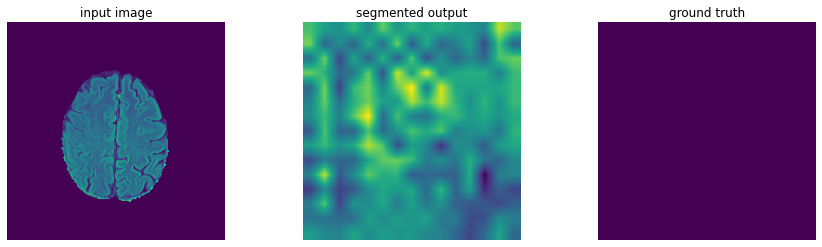

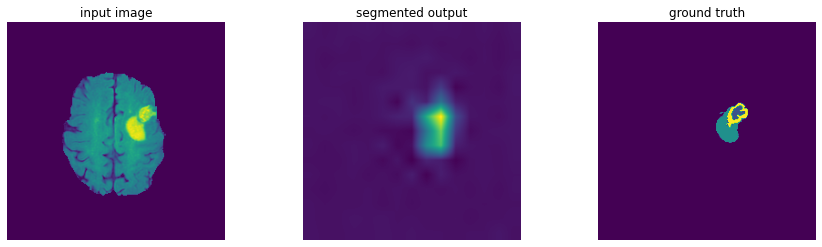

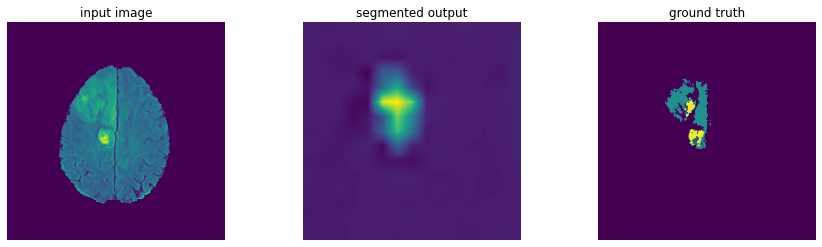

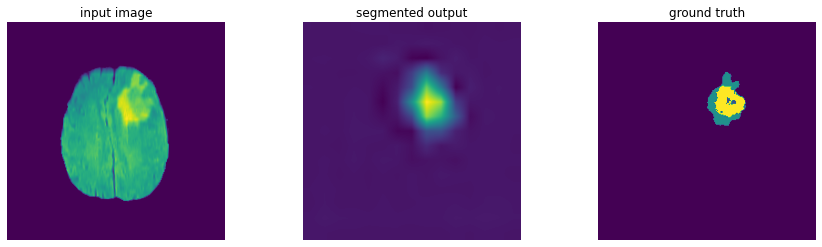

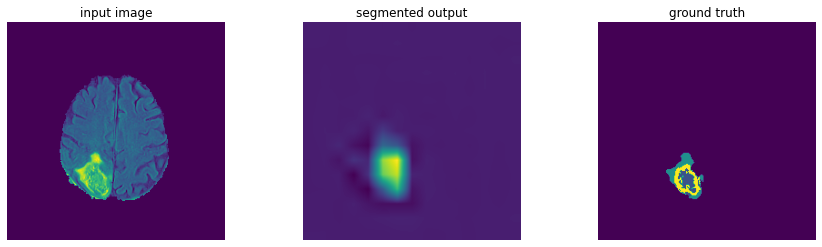

In [303]:
plot_deeplab_mobile_predictions(model, images, indexes_predict=[6, 0, -1, 2, 3])

In [286]:
def plot_mobile_prediction_from_path(model, img_path):
    img = Image.open(img_path)
    plt.imshow(img)
    print(np.array(img).shape)

    input_tensor = torch.tensor(np.array(img)).type(torch.ShortTensor).float()
    input_tensor = torch.transpose(input_tensor, 0, 2)
    print(input_tensor.shape)

    input_batch = input_tensor.unsqueeze(0) 

    with torch.no_grad():
        output = model(input_batch)['out'][0]
    output_predictions = output 

    # create a color pallette, selecting a color for each class
    palette = torch.tensor([2 ** 25 - 1, 2 ** 15 - 1, 2 ** 21 - 1])
    colors = torch.as_tensor([i for i in range(21)])[:, None] * palette
    colors = (colors % 255).numpy().astype("uint8")

    _, ax = plt.subplots(1, 2, figsize=(15, 4))
    ax[0].set_title('input image')
    ax[0].axis('off')
    ax[0].imshow(input_tensor[0])
    ax[1].set_title('segmented output')
    ax[1].axis('off')
    ax[1].imshow(output_predictions[0])
    plt.show()

In [293]:
pred_path = Path(os.getcwd()) / 'data_extracted' / 'flair' / 'flair_0.jpeg'

In [319]:
img = np.array(Image.open(pred_path))
img.shape

(240, 240, 3)

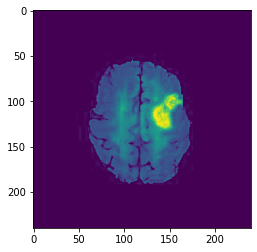

In [326]:
plt.imshow(img[:, :, 0])

In [318]:
images[0][0].shape

(240, 240)

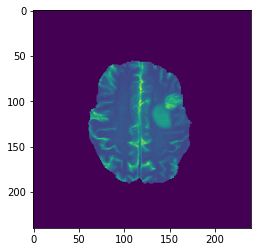

In [308]:
plt.imshow(images[0][0])

(240, 240, 3)
torch.Size([3, 240, 240])


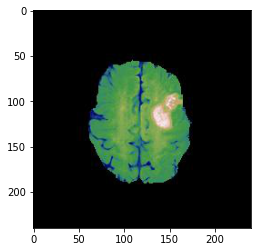

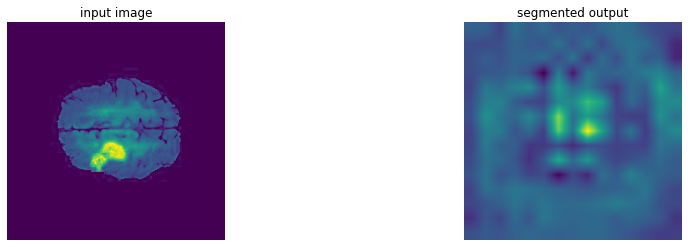

In [294]:
plot_mobile_prediction_from_path(model, pred_path)

In [210]:
df = pd.read_csv(LOGS_FILE_PATH)

<AxesSubplot:xlabel='epoch'>

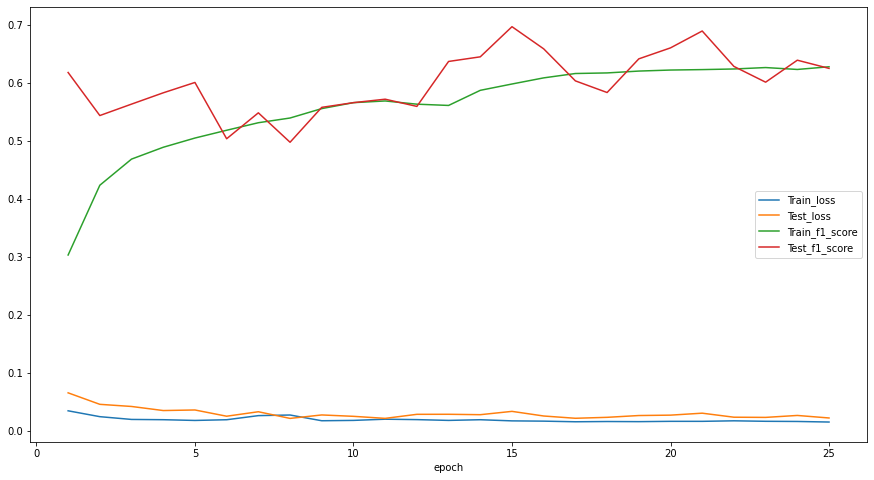

In [211]:
df.plot(x='epoch',figsize=(15,8))